## Ocean Stats

In [1]:
%%capture 
# comment above line to see details about the run(s) displayed
from misc import *
print("Last update:", date.today())
%matplotlib inline

In [2]:
# Make the graphs a bit prettier, and bigger
#plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams.update({'font.size': 15})

### Globally-integrated T & S

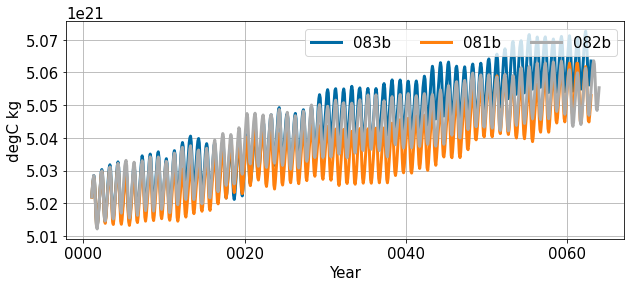

In [3]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,4))

for c, l, p in zip(casename,label, ocn_path):
  ds = xr.open_dataset(p+'{}_mon_ave_global_means.nc'.format(c)).sel(time=slice('0001-01-01',end_date))
  ds['opottempmint'].plot(ax=ax, label=l, lw=3)

#plt.suptitle(ds.opottempmint.attrs['long_name'])
ax.set_ylabel(ds.opottempmint.attrs['units'])
ax.set_xlabel('Year')
ax.grid()
ax.legend(ncol=3,loc=1);

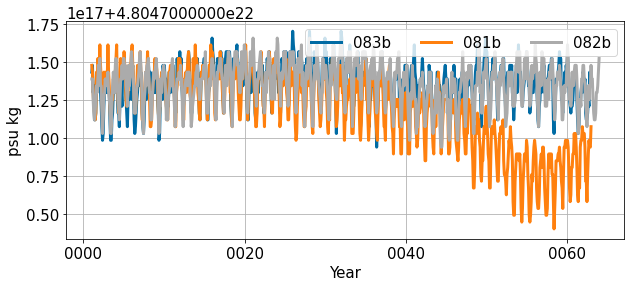

In [4]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,4))

for c, l, p in zip(casename,label, ocn_path):
  ds = xr.open_dataset(p+'{}_mon_ave_global_means.nc'.format(c)).sel(time=slice('0001-01-01',end_date))
  ds['somint'].plot(ax=ax, label=l, lw=3)

#plt.suptitle(ds.somint.attrs['long_name'])
ax.set_ylabel(ds.somint.attrs['units'])
ax.set_xlabel('Year')
ax.grid()
ax.legend(ncol=3,loc=1);

### Globally-averaged T & S

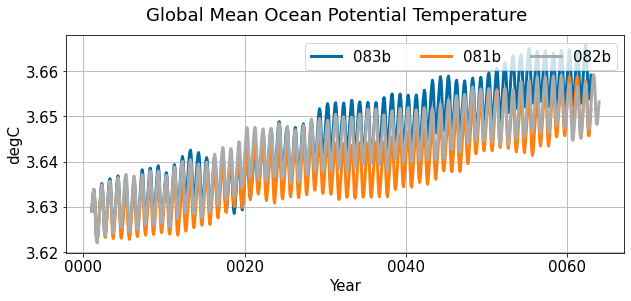

In [5]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,4))

for c, l, p in zip(casename,label, ocn_path):
  ds = xr.open_dataset(p+'{}_mon_ave_global_means.nc'.format(c)).sel(time=slice('0001-01-01',end_date))
  ds['thetaoga'].plot(ax=ax, label=l, lw=3)

plt.suptitle(ds.thetaoga.attrs['long_name'])
ax.set_title('')
ax.set_ylabel(ds.thetaoga.attrs['units'])
ax.set_xlabel('Year')
ax.grid()
ax.legend(ncol=3,loc=1);

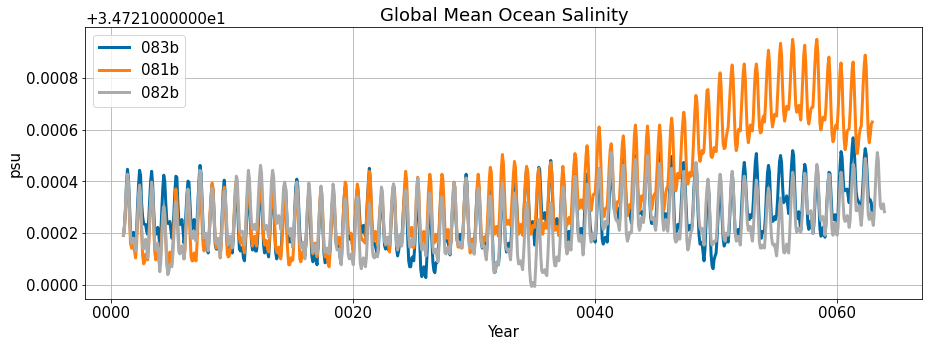

In [6]:
fig, ax = plt.subplots()
for c, l, p in zip(casename,label, ocn_path):
  ds = xr.open_dataset(p+'{}_mon_ave_global_means.nc'.format(c)).sel(time=slice('0001-01-01',end_date))
  ds['soga'].plot(ax=ax, label=l, lw=3)
    
ax.set_title(ds.soga.attrs['long_name'])
ax.set_ylabel(ds.soga.attrs['units'])
ax.set_xlabel('Year')
ax.grid()
ax.legend();

In [7]:
ocean_stats = []
for c, l, p in zip(casename,label, ocn_path):
  ds = xr.open_dataset(p+'{}_ocean.stats.nc'.format(c), decode_times=False)#.sel(time=slice('0001-01-01',end_date))
  stats_monthly = ds#.resample(time="1M", 
                    #           closed='left',
                    #           keep_attrs='True').mean('time', keep_attrs=True)
  ocean_stats.append(stats_monthly) 

### Truncations

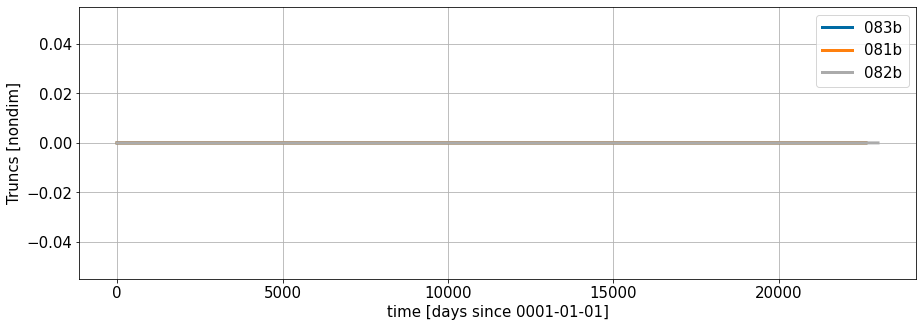

In [8]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].Truncs.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid()

### Maximum finite-volume CFL

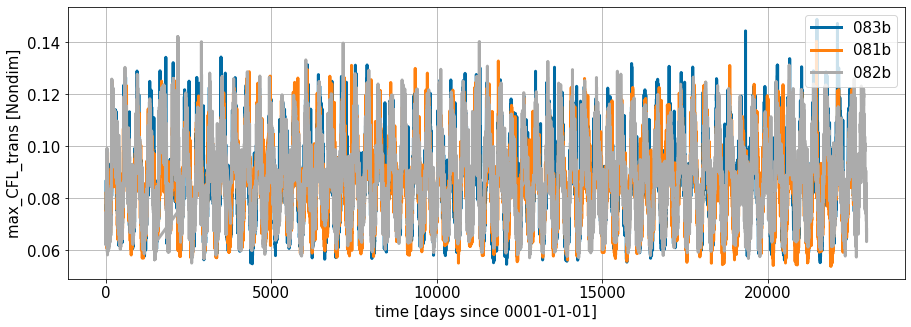

In [9]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].max_CFL_trans.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Maximum finite-difference CFL

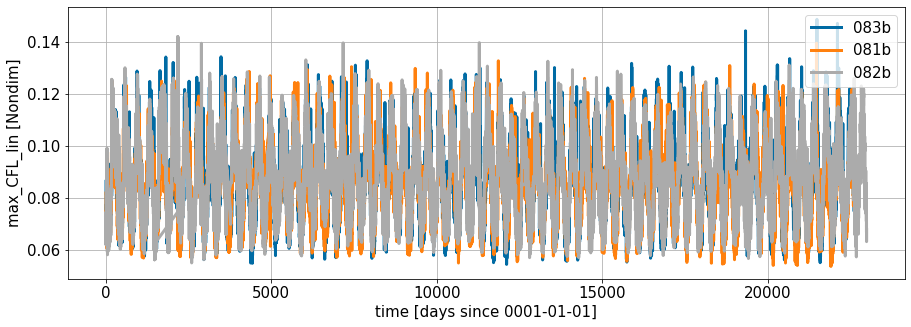

In [10]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].max_CFL_lin.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Maximum CFL

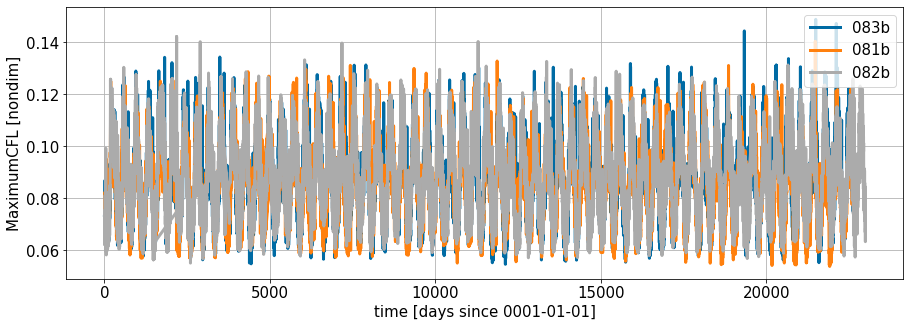

In [11]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].MaximumCFL.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Energy/Mass

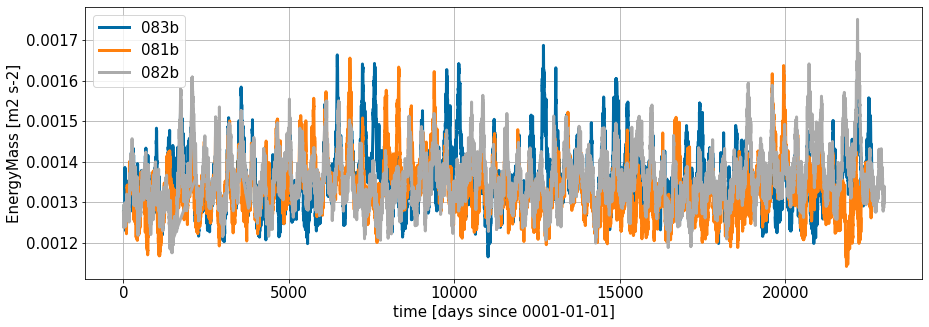

In [12]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].EnergyMass.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Mean Sea Level

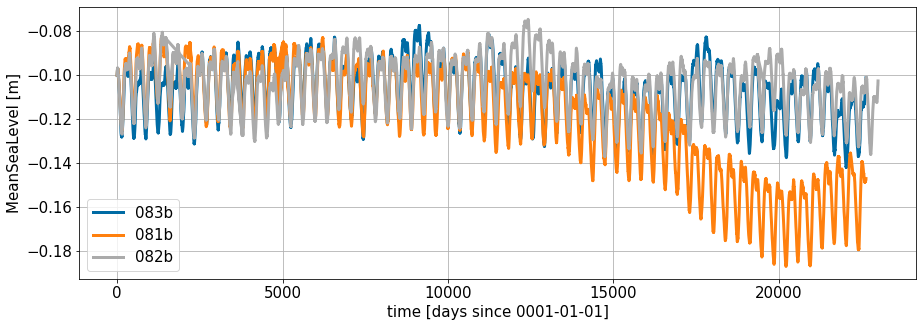

In [13]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].MeanSeaLevel.plot.line(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Total Mass

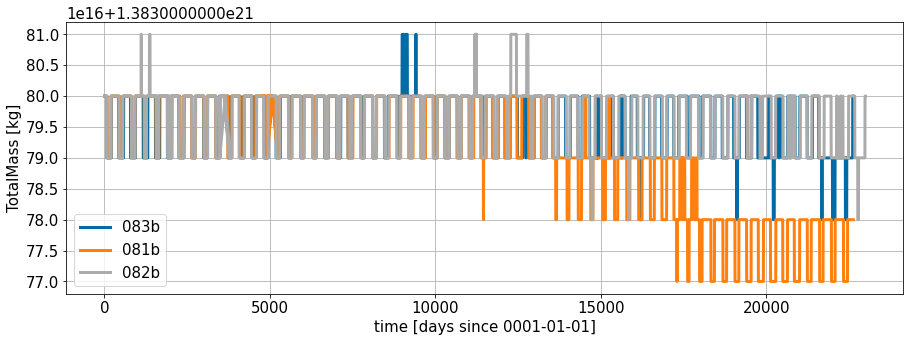

In [14]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].TotalMass.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Mean Salinity

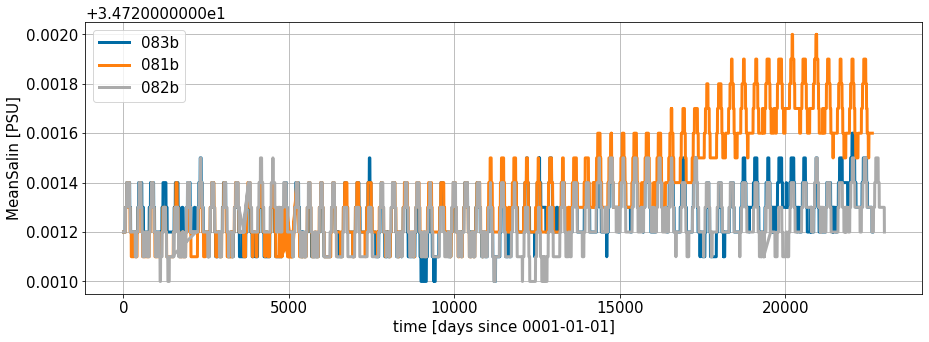

In [15]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].MeanSalin.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Mean Temperature

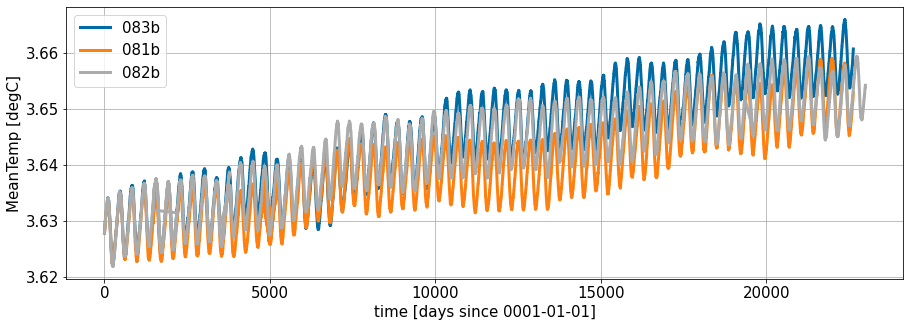

In [16]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].MeanTemp.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Total Energy

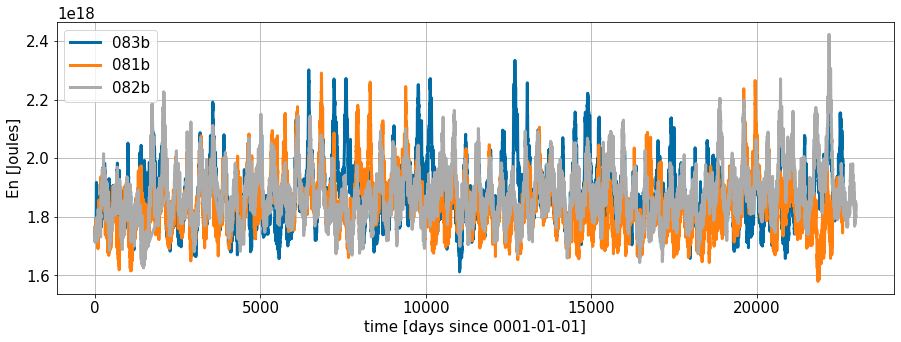

In [17]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].En.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Available Potential Energy

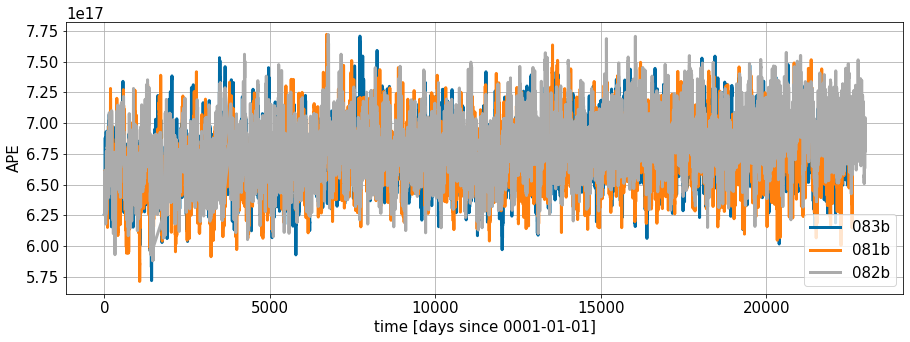

In [18]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].APE.sum(axis=1,
                      keep_attrs=True).plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Total Salt

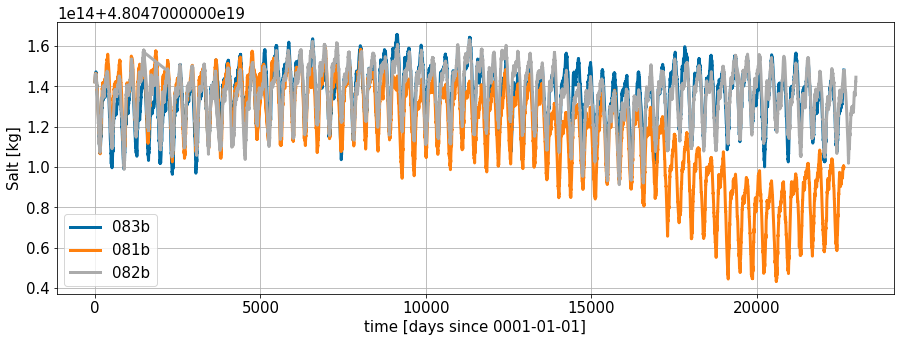

In [19]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].Salt.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Total Salt Change between Entries

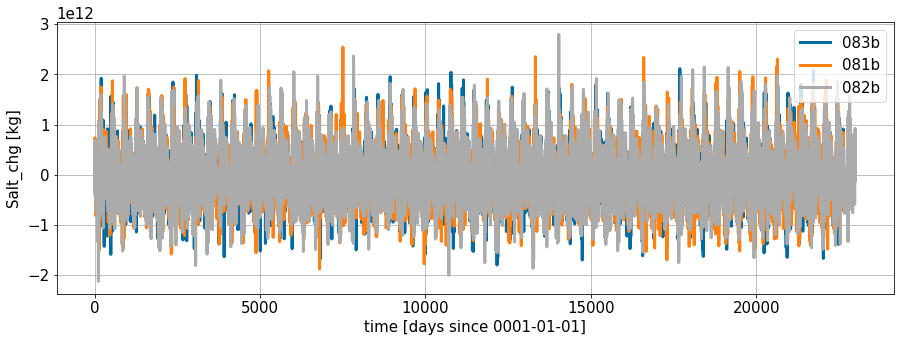

In [20]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].Salt_chg.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Anomalous Total Salt Change

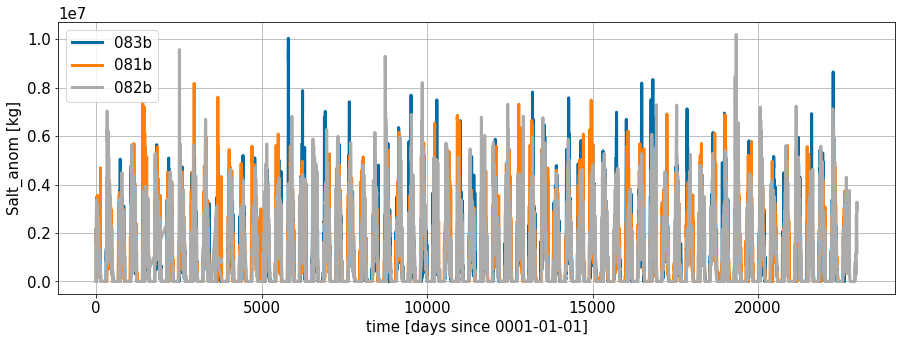

In [21]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].Salt_anom.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Total Heat

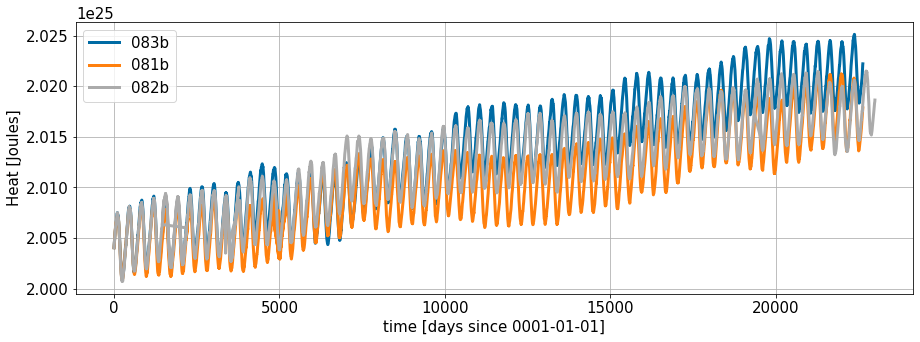

In [22]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].Heat.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Total Heat Change between Entries

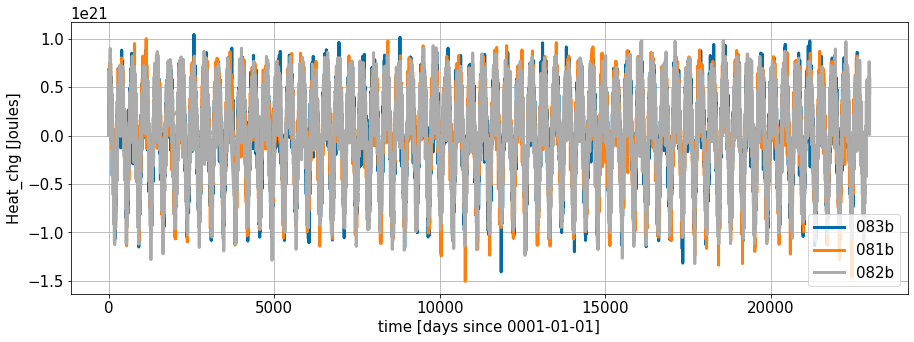

In [23]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].Heat_chg.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Anomalous Total Heat Change

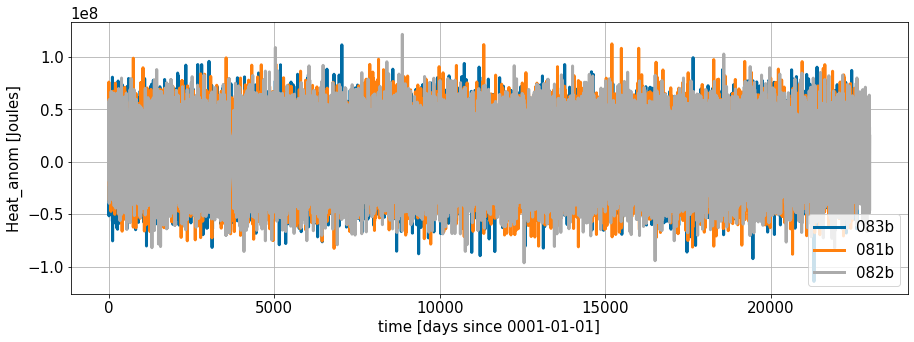

In [24]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].Heat_anom.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();

### Age

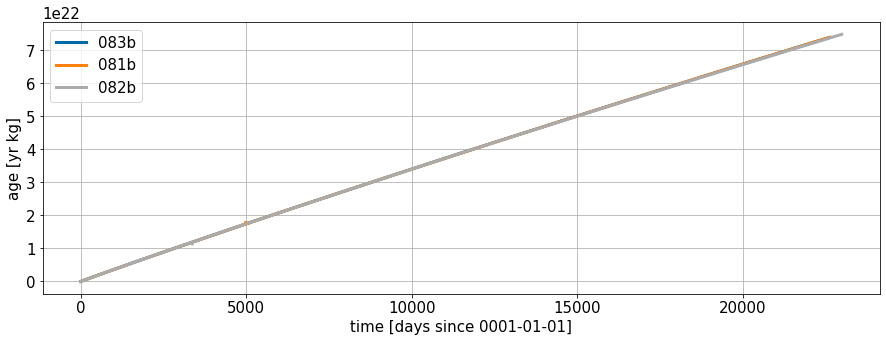

In [25]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].age.plot(ax=ax,label=l,lw=3);
    
ax.legend()
ax.grid();